In [136]:
using Plots
using LinearAlgebra

In [137]:
function multivariate_normal(x, d, μ, Σ)
    xₘ = x .- μ
    exponent = -(xₘ' * inv(Σ) * xₘ) / 2
    normalization = 1. / √((2 * π)^d * det(Σ))
    return normalization * exp(exponent)
end

multivariate_normal (generic function with 1 method)

In [138]:
function meshgrid(x, y)
   X = [x for _ in y, x in x]
   Y = [y for y in y, _ in x]
   X, Y
end

meshgrid (generic function with 1 method)

In [139]:
# Define multivariate normal distribution parameters
μ = [0.0, 0.0]  # Mean
Σ = [1.0 0.0; 0.0 1.0]  # Covariance

2×2 Matrix{Float64}:
 1.0  0.0
 0.0  1.0

In [140]:
Nₓ = 100 # grid size
x1s = range(-5, stop=5, length=Nₓ)
x2s = range(-5, stop=5, length=Nₓ)

-5.0:0.10101010101010101:5.0

In [141]:
d = 2
x1, x2 = meshgrid(x1s, x2s); @show typeof(meshgrid(x1s, x2s))# Generate grid

typeof(meshgrid(x1s, x2s)) = Tuple{Matrix{Float64}, Matrix{Float64}}


Tuple{Matrix{Float64}, Matrix{Float64}}

In [142]:
pdf = [multivariate_normal([x1[i, j], x2[i, j]], d, μ, Σ) for i in 1:size(x1, 1), j in 1:size(x1, 2)];

In [143]:
 @show size(x1),size(x2), size(pdf);

(size(x1), size(x2), size(pdf)) = ((100, 100), (100, 100), (100, 100))


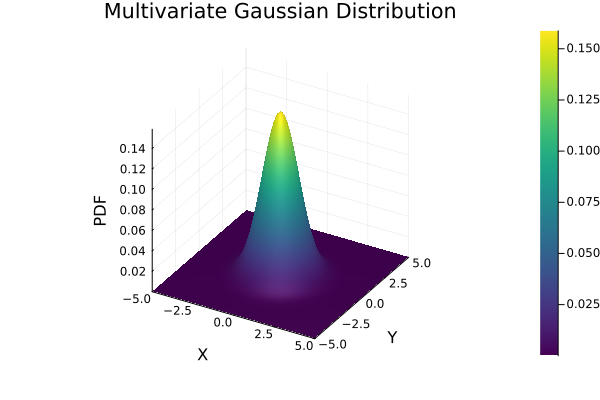

In [144]:
# Plot the surface
surface(x1s, x2s, pdf
    , xlabel="X"
    , ylabel="Y"
    , zlabel="PDF"
    , title="Multivariate Gaussian Distribution"
    , color=:viridis
    # , color=:auto
)

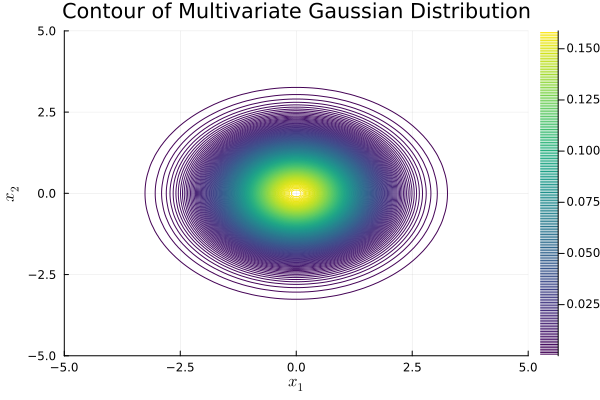

In [145]:
# Plot the contour with a colormap
contour(x1s, x2s, pdf
    , xlabel="\$x_1\$", ylabel="\$x_2\$"
    , title="Contour of Multivariate Gaussian Distribution"
    , levels=200
    , color=:viridis
    # , c=:auto
)

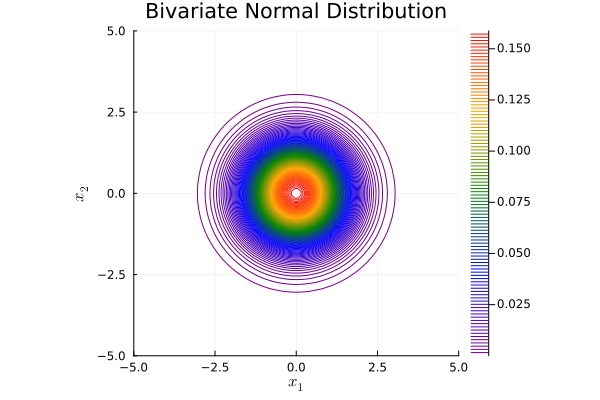

In [146]:
# Plot bivariate distribution
plot(
    contour(x1s, x2s, pdf, levels=100, color=:rainbow),
    xlabel="\$x_1\$", ylabel="\$x_2\$",
    xlim=(-5, 5), ylim=(-5, 5),
    aspect_ratio=:equal,
    title="Bivariate Normal Distribution"
)